# Fermion parity switches imprinted in the photonic field of cavity embedded Kitaev chains

In this notebook we plot figures 8, 9 and 13 of the manuscript entitled ``[Fermion parity switches imprinted in the photonic field of cavity embedded Kitaev chains](https://arxiv.org/abs/2506.06237)''. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import h5py

from scipy.sparse import eye, coo_array, bmat

In [2]:
n_sites = 11
mx_Nph = 21

In [3]:
def ph_numb_op():

    ph_numb = 0*eye(int(2**(n_sites-1)))
    for n_ph in range(1,mx_Nph):
        ph_numb = bmat([[ph_numb,None],[None,n_ph*eye(int(2**(n_sites-1)))]])

    return ph_numb

In [4]:
N_phot = ph_numb_op()

def phn_av(arrcomp,E_ev,E_od,gnd_ev,gnd_od):
    
    #print(N_phot.shape,ground_ev.shape)
    
    evenodd = []

    for ii in range(len(arrcomp)):
        if E_ev[ii,0] <= E_od[ii,0]:
            evenodd.append(np.dot(np.conj(gnd_ev[ii,::]),N_phot.dot(gnd_ev[ii,::])))
        else:
            evenodd.append(np.dot(np.conj(gnd_od[ii,::]),N_phot.dot(gnd_od[ii,::])))

    return np.array(evenodd)

In [5]:
folder = './data_mf/'
pre = 'res'
mid = 'SquaredOmega='
last = '.txt'
type = ['P','X']
freqlist = ['03','05','08']

list =[folder+pre+aa+mid+str(bb) for aa in type for bb in freqlist]
list

['./data_mf/resPSquaredOmega=03',
 './data_mf/resPSquaredOmega=05',
 './data_mf/resPSquaredOmega=08',
 './data_mf/resXSquaredOmega=03',
 './data_mf/resXSquaredOmega=05',
 './data_mf/resXSquaredOmega=08']

In [6]:
for file in list:
    
    with open(file+'.txt', 'r') as f:
    
        text = f.read()
        patn = re.sub(r"[\([{})\]]", "", text)
        npat= re.sub(r"[\([*I)\]]", "", patn)
        mpat= re.sub(r"[\([+)\]]", ",", npat)
    
    with open(file+'_new.txt', 'w') as my_file:
        my_file.write(mpat) 

In [7]:
A = [np.loadtxt(file+'_new.txt', delimiter=',') for file in list]

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": "11.0"
})

In [9]:
texfreqlist = [r'$0.3$',r'$0.5$',r'$0.8$']

## Field quadratures (mean field decoupling)

The cell below contains instructions to make figure 12 (7) in the manuscript (appendix).

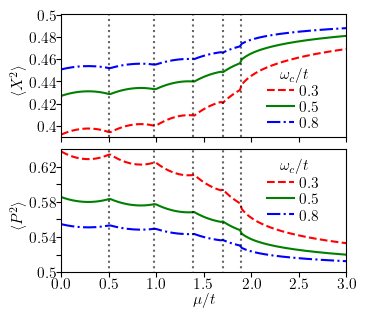

In [10]:
fig, sub = plt.subplots(2,1, figsize=(3.5,3.0), sharex=True)

colimlist = ['red','green','blue']
lstyle = ['--','-','-.']

n = n_sites
if n % 2 == 0:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*n)+1)]
else:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*(n-1))+1)]


for ii in range(3):
    
    sub[0].plot(A[3+ii][::,0],A[3+ii][::,1], ls=lstyle[ii], color=colimlist[ii], 
                label=' '+texfreqlist[ii])
    sub[1].plot(A[ii][::,0],A[ii][::,1], ls=lstyle[ii], color=colimlist[ii], 
                label=' '+texfreqlist[ii])        
 

    #sub[1].plot(quad_mtx[::,0],quad_mtx[::,1])
for murts in muroots:
    sub[0].plot(murts*np.ones(len(muroots)),np.linspace(0.38,0.65,len(muroots)), ':k', alpha=0.6)
    sub[1].plot(murts*np.ones(len(muroots)),np.linspace(0.38,0.65,len(muroots)), ':k', alpha=0.6)

for ii in range(2):
    sub[ii].tick_params(axis='y', pad=0.2)
    sub[ii].tick_params(axis='x', pad=0.5)
    sub[ii].set_xticks(np.linspace(0,3,7))
    #sub[ii].set_xticklabels([r'$0.0$','',r'$1.0$','',r'$2.0$','',r'$3.0$'])
    sub[ii].legend(frameon=False, loc=(0.7,0.0+0.35*(-ii)**2), ncols=1, handlelength=1.8, handletextpad=0.3, 
                   labelspacing = 0.15, columnspacing=0.33)


sub[0].set_ylabel(r'$\langle X^{2}\rangle$', y=0.47, labelpad=2)
sub[1].set_ylabel(r'$\langle P^{2}\rangle$', y=0.47, labelpad=2)
sub[0].set_xlim(0.0,3.0)
#sub[1].set_ylabel(r'$\langle \,a^2 + a^{\dagger\,2}\rangle $',labelpad=-2)
#sub[1].text(2.3,-0.0155,r'$\omega_c/t$')
sub[1].set_xlabel(r'$\mu/t$', labelpad=0)
sub[0].text(2.3,0.443,r'$\omega_c/t$')
sub[1].text(2.3,0.617,r'$\omega_c/t$')

sub[1].set_ylim(0.5,0.64)
sub[1].set_yticks(np.linspace(0.5,0.62,7))
sub[1].set_yticklabels([r'$0.5$','',r'$0.54$','',r'$0.58$','',r'$0.62$'])
sub[0].set_ylim(0.39,0.5004)
sub[0].set_yticks(np.linspace(0.4,0.5,6))
sub[0].set_yticklabels([r'$0.4$',r'$0.42$',r'$0.44$',r'$0.46$',r'$0.48$',r'$0.5$'])

fig.subplots_adjust(left=0.155, right=0.97, hspace=0.1, top=0.98,bottom=0.12)
plt.savefig('quad_vs_mu_mf.pdf')

In [11]:
folder = './data_mf/'
last = 'NphMu'
type = ['P','X']
inlist = ['Analytics','MeanField']

list =[folder+aa+last for aa in inlist]
list

['./data_mf/AnalyticsNphMu', './data_mf/MeanFieldNphMu']

In [12]:
for file in list:
    
    with open(file+'.txt', 'r') as f:
    
        text = f.read()
        #print(text)
        del1 = re.sub(r"[\([{})\]]", "", text)
        del2 = re.sub(r"[\([*)\]]", "", del1)
        sub1 = re.sub(r"[\([^)\]]", r"E", del2)
        del3 = re.sub(r"[\([I)\]]", "", sub1)
        sub2 = re.sub(r"[\([+)\]]", ",", del3)
        #print(sub2)    

    with open(file+'_new.txt', 'w') as my_file:
        my_file.write(sub2) 

In [13]:
B = [np.loadtxt(file+'_new.txt', delimiter=',') for file in list]

In [14]:
folroot = './data_ED/'
prename = 'Evecs_vs_mu_w'
lstname = '_g0.1_ns_11.hdf5'
filED = folroot+prename+'5.0'+lstname

dataED = h5py.File(filED,'r')

## Analytical analysis in the weak coupling regime

The cell below contains instructions to make figure 9 (4) in the manuscript (appendix).

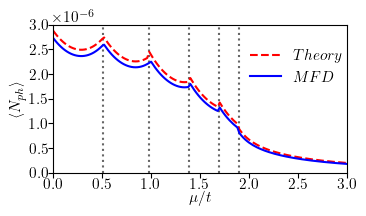

In [15]:
fig, sub = plt.subplots(1, figsize=(3.5,2.0))

n = 11
if n % 2 == 0:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*n)+1)]
else:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*(n-1))+1)]

for murts in muroots:
    sub.plot(murts*np.ones(len(muroots)),np.linspace(0.0,5e-6,len(muroots)), ':k', alpha=0.6)

arrcomp = dataED.get('mu')
energy_ev = dataED.get('E_mat_par_even')
energy_od = dataED.get('E_mat_par_odd')
Vcs_ev = dataED.get('V_mat_par_even')
Vcs_od = dataED.get('V_mat_par_odd')

ph_numb = phn_av(arrcomp,energy_ev,energy_od,Vcs_ev[::,::,0],Vcs_od[::,::,0])

sub.plot(B[0][:,0],B[0][:,1], '--r', label=r'$Theory$')
sub.plot(B[1][:,0],B[1][:,1], '-b', label=r'$MFD$')
#sub.plot(arrcomp[::], ph_numb)

#sub.set_yscale('log')
sub.tick_params(axis='y', pad=0.2)
sub.tick_params(axis='x', pad=0.5)
sub.set_xlim(0,3)
sub.set_xticks(np.linspace(0,3,7))
sub.set_ylim(0,3e-6)
sub.set_yticks(np.linspace(0,3e-6,7))

sub.set_xlabel(r'$\mu/t$', labelpad=-1)
sub.set_ylabel(r'$\langle N_{ph}\rangle$', labelpad=2)
sub.legend(frameon=False, loc=(0.65,0.55))

fig.subplots_adjust(left=0.13, right=0.97, wspace=0.07, top=0.91,bottom=0.17)
plt.savefig('photoNumb_MF_Theory.pdf')

## Dependence of the parity switches on $g$

The cells below contain the data and instructions to make figure 8 (3) in the manuscript (appendix).

In [16]:
# List with values of the light-matter coupling strength
glist = [0.0007,0.05,0.1,0.15,0.2,0.25]
# List with the values of the highest mu where the energy of the ground state crosses. 
tranline = [1.892808,1.892714,1.892429,1.891945,1.891229,1.890284]

1.8928203230275509


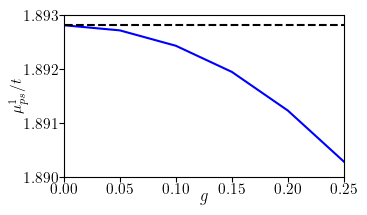

In [17]:
fig, sub = plt.subplots(1, figsize=(3.5,2.0))

sub.plot(glist,tranline, 'blue')
sub.plot(np.array(glist),muroots[0]*np.ones(6), '--k')

sub.set_xlabel(r'$g$',labelpad=-5, fontsize=12)
sub.set_ylabel(r'$\mu_{ps}^1/t$',labelpad=-3, rotation='vertical', y=0.5)
sub.set_xlim(0,0.25)
sub.set_xticks(np.linspace(0,0.25,6))
sub.set_ylim(1.89,1.893)
sub.set_yticks(np.linspace(1.89,1.893,4))
#sub.text(0.07,1.891,r'$even/odd$')
#sub.text(0.18,1.8922,r'$odd$')

sub.tick_params(axis='y', pad=0.2)
sub.tick_params(axis='x', pad=0.5)

print(muroots[0])

fig.subplots_adjust(left=0.16, right=0.96, wspace=0.07, top=0.96,bottom=0.15)
plt.savefig('transition_line.pdf')